---
# Thí Ngiệm
---

<table>
    <thead>
        <tr>
            <th>Thông số ảnh hưởng</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <td>Kích thước quần thể</td>
        </tr>
    </tbody>
</table>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Genetic_Algorithm import * 

### Nhập số liệu tính toán:

In [2]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 45, Value = 98
Vật phẩm 2: Weight = 78, Value = 210
Vật phẩm 3: Weight = 123, Value = 155
Vật phẩm 4: Weight = 237, Value = 345
Vật phẩm 5: Weight = 56, Value = 67
Vật phẩm 6: Weight = 111, Value = 122
Vật phẩm 7: Weight = 89, Value = 134
Vật phẩm 8: Weight = 232, Value = 89
Vật phẩm 9: Weight = 344, Value = 450
Vật phẩm 10: Weight = 190, Value = 170
Vật phẩm 11: Weight = 70, Value = 77
Vật phẩm 12: Weight = 250, Value = 190
Vật phẩm 13: Weight = 135, Value = 280
Vật phẩm 14: Weight = 376, Value = 300
Vật phẩm 15: Weight = 92, Value = 113
Vật phẩm 16: Weight = 187, Value = 265
Vật phẩm 17: Weight = 315, Value = 190
Vật phẩm 18: Weight = 220, Value = 158
Vật phẩm 19: Weight = 180, Value = 99
Vật phẩm 20: Weight = 260, Value = 340

Maximum capacity = 2393


### Ghi lại thông số thay đổi với từng kích thước quần thể

In [3]:
# Thực hiện thử nghiệm với các kích thước quần thể khác nhau
population_sizes = [50, 100, 200, 500]
experiment_results = {}

def run_experiment_with_population(pop_size):
    global POPULATION_SIZE, fitness_history
    
    # Lưu giá trị POPULATION_SIZE ban đầu
    original_pop_size = POPULATION_SIZE
    
    # Thay đổi POPULATION_SIZE cho thử nghiệm
    POPULATION_SIZE = pop_size
    
    # Thực hiện thuật toán di truyền
    best_solution, best_fitness = genetic_algorithm()
    
    # Lưu kết quả
    result = {
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history.copy()  # Lưu lại lịch sử fitness
    }
    
    # Reset fitness_history sau mỗi lần thử nghiệm
    fitness_history.clear()
    
    # Khôi phục giá trị POPULATION_SIZE ban đầu
    POPULATION_SIZE = original_pop_size
    
    return result

# Thực hiện các thử nghiệm cho các kích thước quần thể khác nhau
for pop_size in population_sizes:
    print(f"\nThử nghiệm với kích thước quần thể: {pop_size}")
    
    # Chạy thử nghiệm
    result = run_experiment_with_population(pop_size)
    
    # Lưu kết quả vào experiment_results
    experiment_results[pop_size] = result
    
    print(f"Best Solution: {result['best_solution']}")
    print(f"Best Fitness: {result['best_fitness']}")
    print(f"Fitness History: {result['fitness_history']}")



Thử nghiệm với kích thước quần thể: 50
Best Solution: [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
Best Fitness: 3069
Fitness History: [2904, 2892, 2838, 2784, 2761, 2962, 2817, 2817, 2635, 2688, 2950, 2894, 2946, 2946, 2946, 2818, 2971, 2779, 2915, 2915, 2704, 2848, 2971, 2971, 2872, 2872, 2893, 2914, 3024, 2933, 2933, 3012, 3024, 3024, 2868, 2868, 2757, 2837, 2770, 2738, 2849, 2817, 2760, 2858, 2915, 2915, 2904, 2915, 2866, 2858, 2959, 2959, 2969, 2924, 2924, 2924, 2924, 2942, 2942, 2824, 2840, 2937, 2981, 2981, 2883, 2871, 2871, 2873, 2904, 2732, 2794, 2814, 2834, 2937, 2736, 2904, 2942, 2914, 2900, 2900, 2900, 2816, 2861, 2869, 3047, 2880, 2880, 2880, 2874, 2862, 2803, 2706, 2740, 2950, 2783, 2783, 2783, 2652, 2815, 2816, 2816, 2740, 2809, 2811, 2831, 2734, 2868, 2868, 2935, 2781, 2951, 2780, 3002, 2889, 2874, 2782, 2791, 2790, 2812, 2833, 2833, 2950, 2724, 2855, 2817, 2954, 2892, 2892, 2892, 2713, 2913, 2913, 2913, 2945, 2801, 2893, 2893, 2890, 2900, 2837, 2880, 2

### Fitness qua các thế hệ với thông số kích thước quần thể giống nhau

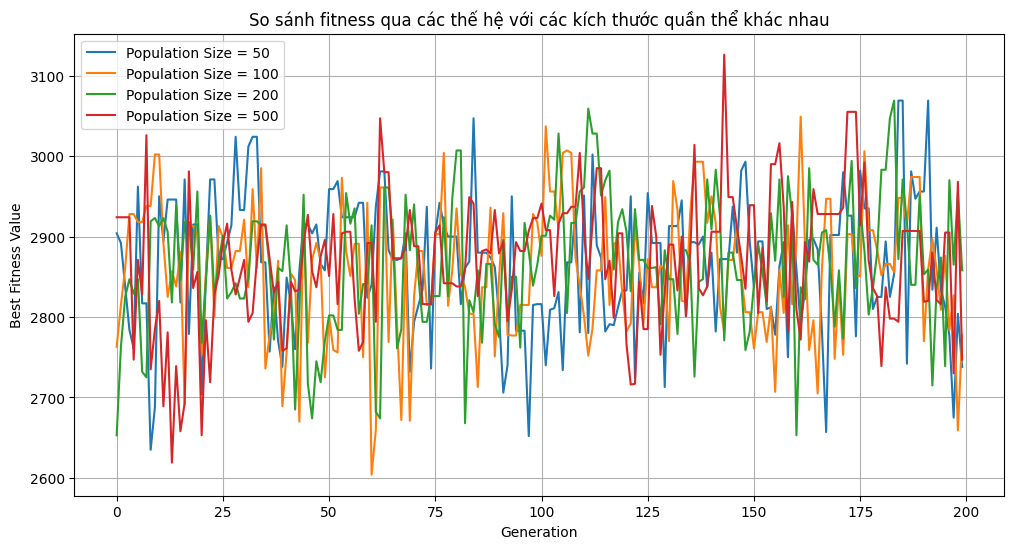

In [4]:
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    plt.plot(experiment_results[pop_size]['fitness_history'], 
             label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('So sánh fitness qua các thế hệ với các kích thước quần thể khác nhau')
plt.legend()
plt.grid(True)
plt.show()

### Bảng kết quả

| Population Size                 | Best Fitness                                              | Convergence Speed                                            |
|----------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|
| Kích thước quần thể (số cá thể) | Fitness tốt nhất trong quần thể tại một thế hệ nhất định | Tốc độ hội tụ (số thế hệ hoặc thời gian để đạt mức tối ưu)  |

In [5]:
# Hiển thị bảng kết quả chi tiết
print("\nKết quả chi tiết:")
print("-" * 60)
print(f"| {'Population Size':^15} | {'Best Fitness':^15} | {'Convergence Speed':^20} |")
print("-" * 60)

for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    # Tính tốc độ hội tụ (số thế hệ để đạt 95% fitness cuối cùng)
    convergence_gen = next(
        (i for i, x in enumerate(history) if x >= 0.95 * final_fitness), 
        len(history)
    )
    
    print(f"| {pop_size:^15} | {final_fitness:^15} | {convergence_gen:^20} |")

print("-" * 60)


Kết quả chi tiết:
------------------------------------------------------------
| Population Size |  Best Fitness   |  Convergence Speed   |
------------------------------------------------------------
|       50        |      2738       |          0           |
|       100       |      2778       |          0           |
|       200       |      2858       |          1           |
|       500       |      2747       |          0           |
------------------------------------------------------------


### Phân tích độ ổn định của fitness qua các thế hệ

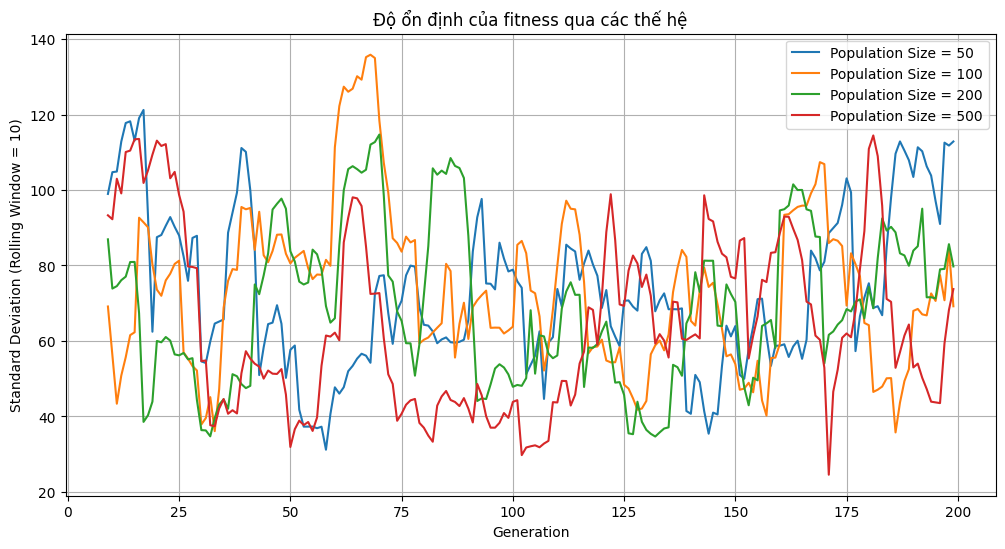

In [8]:
# Phân tích thêm về tính ổn định
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    # Tính độ dao động của fitness
    rolling_std = pd.Series(history).rolling(window=10).std()
    plt.plot(rolling_std, label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Standard Deviation (Rolling Window = 10)')
plt.title('Độ ổn định của fitness qua các thế hệ')
plt.legend()
plt.grid(True)
plt.show()

### Tổng Kết Sau Khi Thí Nghiệm

In [9]:
# Tổng kết
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    print(f"\nKích thước quần thể {pop_size}:")
    print(f"- Fitness cuối cùng: {final_fitness}")
    print(f"- Tốc độ hội tụ: {next((i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history))} thế hệ")
    print(f"- Độ ổn định (std): {np.std(history):.2f}")


Kích thước quần thể 50:
- Fitness cuối cùng: 2738
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 81.99

Kích thước quần thể 100:
- Fitness cuối cùng: 2778
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 81.23

Kích thước quần thể 200:
- Fitness cuối cùng: 2858
- Tốc độ hội tụ: 1 thế hệ
- Độ ổn định (std): 79.85

Kích thước quần thể 500:
- Fitness cuối cùng: 2747
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 78.19


---
# Kết Luận
---